In [5]:
import pandas as pd

In [7]:
#load imbd_1000 
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/imdb_1000.csv'
movies = pd.read_csv(path)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [8]:
# examin data types
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

### numeric columns: star_ratings, duration

### non-numeric columns: title, genre, actors list

## exploring a non-numeric column


In [11]:
# getunique values of movie ratings column
movies.content_rating.unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [12]:
# a number of unique values from ratings column
movies.content_rating.nunique()

12

In [15]:
# counts of unique values / tallies of values
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [16]:
# percentage instead of count

In [18]:
movies.content_rating.value_counts(normalize=True)

R            0.471311
PG-13        0.193648
PG           0.126025
NOT RATED    0.066598
APPROVED     0.048156
UNRATED      0.038934
G            0.032787
PASSED       0.007172
NC-17        0.007172
X            0.004098
GP           0.003074
TV-MA        0.001025
Name: content_rating, dtype: float64

In [19]:
# view documentation of function
movies.content_rating.value_counts?

<AxesSubplot:>

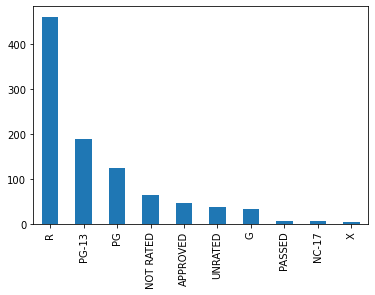

In [22]:
# chain multiple methods: count, top 10, plot bar
movies.content_rating.value_counts().head(10).plot.bar()

## exploring a numeric column

In [24]:
# mean duration
movies.duration.mean()

120.97957099080695

In [26]:

movies.duration.max()

242

In [29]:
# ^ to get the exact movie with the max duration
movies.loc[movies.duration == movies.duration.max(),:]

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [31]:
movies.duration.std()

26.218009846412112

In [38]:
movies.duration.plot.hist(bins=15) # bins defaults to 10


<AxesSubplot:ylabel='Density'>

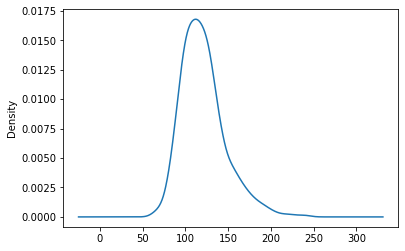

In [39]:
# probability distribution
movies.duration.plot.density()

In [41]:
# give multiple stat numbers
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [43]:
# describe two columns
movies[['duration', 'star_rating']].describe()

,duration,star_rating
count,979.000000,979.000000
mean,120.979571,7.889785
std,26.218010,0.336069
min,64.000000,7.400000
25%,102.000000,7.600000
50%,117.000000,7.800000
75%,134.000000,8.100000
max,242.000000,9.300000


In [44]:
# say we just want max min and std from table above
movies[['duration', 'star_rating']].agg(['max', 'min', 'std'])

,duration,star_rating
max,242.00000,9.300000
min,64.00000,7.400000
std,26.21801,0.336069


## Working with times and dates

In [47]:
# load the UFO data
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/ufo.csv'
ufo = pd.read_csv(path)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [48]:
ufo.loc[0, 'Time'] # returns a string, but not useful

'6/1/1930 22:00'

In [52]:
# convert time string into a date time format
# also replace strings with datatime format
ufo['Time'] = pd.to_datetime(ufo.Time)


In [53]:
ufo.loc[0, 'Time']

Timestamp('1930-06-01 22:00:00')

In [54]:
ufo.Time.dt.time # just get time

0        22:00:00
1        20:00:00
2        14:00:00
3        13:00:00
4        19:00:00
           ...   
18236    23:00:00
18237    23:00:00
18238    23:45:00
18239    23:45:00
18240    23:59:00
Name: Time, Length: 18241, dtype: object

In [55]:
ufo.Time.dt.year # just get year

0        1930
1        1930
2        1931
3        1931
4        1933
         ... 
18236    2000
18237    2000
18238    2000
18239    2000
18240    2000
Name: Time, Length: 18241, dtype: int64

In [59]:
# get sightings after 1999
ufo.loc[ufo.Time >= pd.to_datetime('01/01/1999'),:]

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [60]:
# get only when month 3
ufo.Time[ufo.Time.dt.month==3]

43      1946-03-15 15:30:00
120     1950-03-22 00:00:00
224     1953-03-15 00:00:00
347     1956-03-01 13:00:00
348     1956-03-20 20:00:00
                ...        
16179   2000-03-31 09:40:00
16180   2000-03-31 14:00:00
16181   2000-03-31 14:00:00
16182   2000-03-31 21:45:00
16183   2000-03-31 23:30:00
Name: Time, Length: 1096, dtype: datetime64[ns]

In [64]:
# plot number of UFOs reported by year
ufo['year'] = ufo.Time.dt.year

<AxesSubplot:>

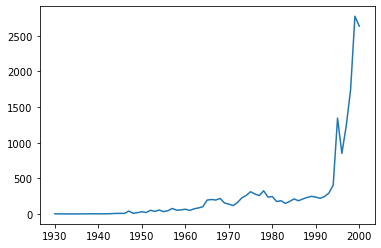

In [67]:
ufo['year'].value_counts().sort_index().plot()

## Working with strings

In [69]:
# normal way to access string methods
# load chipotle data
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/chipotleorders.csv'
orders = pd.read_csv(path)
orders

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [70]:
orders.item_name.str.upper() # make everything upper

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [71]:
# Find orders with the string 'chicken' in item_name
orders.loc[orders.item_name.str.contains('Chicken'),:]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [73]:
# remove square brackets in choice_description
orders['choice_description'] = orders.choice_description.str.replace('[', '').str.replace(']', '')

C:\Users\Derrick\AppData\Local\Temp\ipykernel_13872\1094210441.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['choice_description'] = orders.choice_description.str.replace('[', '').str.replace(']', '')
